In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs
import matplotlib.pyplot as plt
import torch

INFO: Using pytorch backend


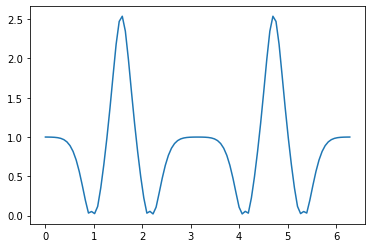

In [2]:
from datasets.synthetic import get_s1_synthetic_immersion as get_immersion
from main_eval import compute_mean_curvature

immersion = get_immersion(distortion_func="bump",radius=1,n_wiggles=3,distortion_amp=0.3,embedding_dim=2,rot=torch.eye(2))
points = gs.linspace(0,2*gs.pi,100)

mean_curvatures = gs.zeros((len(points), 2))
mean_curvature_norms = gs.zeros(len(points))
for i_point, point in enumerate(points):
    point = gs.array([[point]])
    curvature, norm = compute_mean_curvature(point, immersion, 1, 2)
    mean_curvatures[i_point] = gs.squeeze(curvature)
    mean_curvature_norms[i_point] = gs.squeeze(norm)

plt.plot(points, mean_curvature_norms);

In [2]:
from datasets.synthetic import load_s1_synthetic

data, labels = load_s1_synthetic(rot=torch.eye(2), n_times=100, radius=1, distortion_amp=0.2, embedding_dim=2, noise_var=1e-3)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [4]:
from main_eval import get_second_fundamental_form as sff

ModuleNotFoundError: No module named 'neuralgeom.datasets'

In [42]:
def get_immersion(radius):    
    def immersion(theta):
        return radius*gs.array([gs.cos(theta), gs.sin(theta)])
    return immersion

def get_sphere_immersion(radius):
    def immersion(point):
        theta = point[0]
        phi = point[1]
        x = gs.sin(theta)*gs.cos(phi)
        y = gs.sin(theta)*gs.sin(phi)
        z = gs.cos(theta)
        return radius*gs.array([x,y,z])
    return immersion

dim = 2
embedding_dim = 3

point = gs.array([gs.pi/3,gs.pi])

immersion = get_sphere_immersion(radius=1)


sec_fun = sff(immersion,point,dim,embedding_dim)

In [2]:
from datasets.synthetic import get_s1_synthetic_immersion as get_immersion
from main_eval import compute_mean_curvature

immersion = get_immersion(distortion_func="bump",radius=1,n_wiggles=3,distortion_amp=0.3,embedding_dim=2,rot=torch.eye(2))
points = gs.linspace(0,2*gs.pi,100)

mean_curvatures = gs.array((len(points), 2))
mean_curvature_norms = gs.array((len(points)))
for point in points:
    print(point)
    point = gs.array([[point]])
    curvature, norm = compute_mean_curvature(point, immersion, 1, 2)
    mean_curvatures.append(curvature)
    mean_curvature_norms.append(norm)

tensor(0.)


RuntimeError: einsum(): the number of subscripts in the equation (1) does not match the number of dimensions (0) for operand 1 and no ellipsis was given